## CS3570 Introduction to Multimedia Technology
### Homework 01    Due: 11:59pm, 3/25/2025


### Reminder

- **You are not allowed to use any function that directly generates the result for each step, except for those provided by us.**
- **Your code must display and output your results to enable us to verify its correctness.**
- **Please follow the instructions in the Jupyter Notebook and complete the parts marked as `"TODO."`**
- **If you encounter any problems or have questions, please post them on eeclass.**
- **Rename your Jupyter Notebook file to `Homework_01_xxxxxxxxx_ooo.ipynb`, where `xxxxxxxxx` is your ID and `ooo` is your name. Ensure you upload it to eeclass before the deadline.**
- **Homework should be submitted before the announced due time. Scores of late homework will be reduced by 20% per day.**


---

## **1. Image Resampling (30%)**
### Implement an image resampling function to **downsample** an image to **1/8th** of its original width and height, then **upsample it back to its original size**. You will apply this to **two different images**, `cat.png` (easier) and `logo.png` (harder), and compare the results.
### (You should not use any built-in function for interpolation.)  

 - (a) Implement **Nearest-neighbor (NN) interpolation** to perform both downsampling and upsampling. Apply this to both `cat.png` and `logo.png`, then display the final restored images. (10%)
 - (b) Implement **Bilinear interpolation** to perform both downsampling and upsampling. Apply this to both `cat.png` and `logo.png`, then display the final restored images. (10%)
 - (c) Compare results from the first and second method. Discuss the differences in image quality and artifacts observed. (10%)


In [7]:
# Install the necessary libraries
# !pip install opencv-python numpy matplotlib

# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt


### Section (a) Nearest Neighbor Interpolation

In [2]:
# Section (a) Nearest-Neighbor Interpolation
def downsample(image, scale=8):
    """Downsamples an image by a given scale factor"""
    h, w, c = image.shape
    new_h, new_w = h // scale, w // scale
    downsampled = np.zeros((new_h, new_w, c), dtype=image.dtype)
    for i in range(new_h):
        for j in range(new_w):
            downsampled[i, j] = image[i * scale, j * scale]
    return downsampled

def upsample_nearest(image, original_shape):
    """Upsamples an image to its original shape using nearest-neighbor interpolation."""
    # TODO
    new_h, new_w = original_shape[:2]
    h, w = image.shape[:2]
    channels = image.shape[2] if image.ndim == 3 else 1
    if channels > 1:
        upsampled = np.zeros((new_h, new_w, channels), dtype=image.dtype)
    else:
        upsampled = np.zeros((new_h, new_w), dtype=image.dtype)

    scale_x = new_h / h
    scale_y = new_w / w

    for i in range(new_h):
        for j in range(new_w):
            src_x = min(int(round(i / scale_x)), h - 1)
            src_y = min(int(round(j / scale_y)), w - 1)
            upsampled[i, j] = image[src_x, src_y]
    return upsampled


### Section (b) Bilinear Interpolation

In [3]:
# Section (b) Bilinear Interpolation
def upsample_bilinear(image, original_shape):
    """Upsamples an image to its original shape using bilinear interpolation."""
    # TODO
    new_h, new_w = original_shape[:2]
    in_h, in_w = image.shape[:2]
    channels = image.shape[2] if image.ndim == 3 else 1

    if channels > 1:
        upsampled = np.zeros((new_h, new_w, channels), dtype=np.float32)
    else:
        upsampled = np.zeros((new_h, new_w), dtype=np.float32)

    scale_x = (in_h - 1) / (new_h - 1) if new_h > 1 else 0
    scale_y = (in_w - 1) / (new_w - 1) if new_w > 1 else 0

    for i in range(new_h):
        for j in range(new_w):
            x = i * scale_x
            y = j * scale_y

            x0 = int(np.floor(x))
            x1 = min(x0 + 1, in_h - 1)
            y0 = int(np.floor(y))
            y1 = min(y0 + 1, in_w - 1)

            wx = x - x0
            wy = y - y0

            if channels > 1:
                top = (1 - wy) * image[x0, y0] + wy * image[x0, y1]
                bottom = (1 - wy) * image[x1, y0] + wy * image[x1, y1]
                upsampled[i, j] = (1 - wx) * top + wx * bottom
            else:
                top = (1 - wy) * image[x0, y0] + wy * image[x0, y1]
                bottom = (1 - wy) * image[x1, y0] + wy * image[x1, y1]
                upsampled[i, j] = (1 - wx) * top + wx * bottom

    return np.clip(upsampled, 0, 255).astype(image.dtype)

### Section (c) :
  > (Add your observation here)

  In my observation using both NN and bilinear interpolation, there are some noticeable differences. The NN method was fast and very simple, but it tends to produce pixelation and jagged edges, and sometimes the transitions are very abrupt. On the other hand, the bilinear interpolation produced a smoother result, reducing the blocky look and jaggedness, though it sometimes made the details a bit blurry.
  In summary:
  - NN is faster and easier but gives a more "staircase" effect.
  - Bilinear is slower but provides smoother, more natural gradations despite slight loss in sharpness.

### Visualize

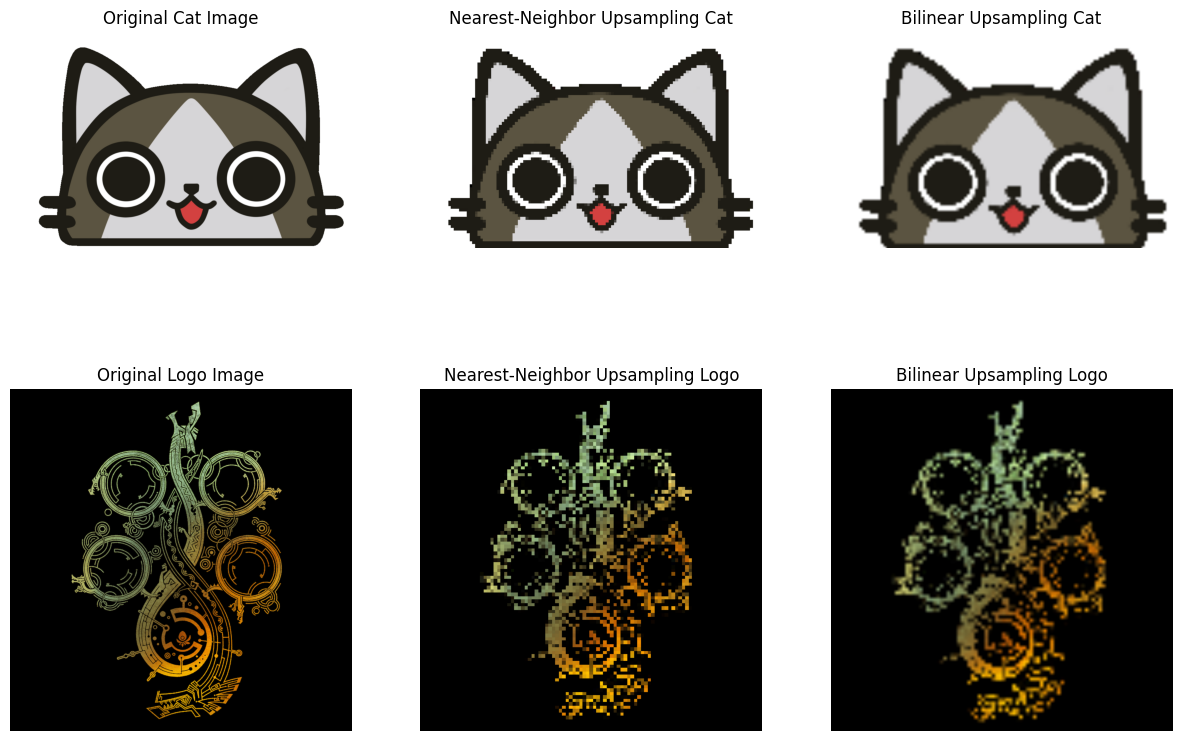

In [ ]:
# Load an image
image_cat = cv2.imread('cat.png')
image_cat = cv2.cvtColor(image_cat, cv2.COLOR_BGR2RGB)  # Convert to RGB format
image_logo = cv2.imread('logo.png')
image_logo = cv2.cvtColor(image_logo, cv2.COLOR_BGR2RGB)  # Convert to RGB format


downsampled_image_cat = downsample(image_cat)
upsampled_nn_image_cat = upsample_nearest(downsampled_image_cat, image_cat.shape)
upsampled_bilinear_image_cat = upsample_bilinear(downsampled_image_cat, image_cat.shape)
downsampled_image_logo = downsample(image_logo)
upsampled_nn_image_logo = upsample_nearest(downsampled_image_logo, image_logo.shape)
upsampled_bilinear_image_logo = upsample_bilinear(downsampled_image_logo, image_logo.shape)

# Show results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(image_cat)
axs[0, 0].set_title("Original Cat Image")
axs[0, 0].axis("off")

axs[0, 1].imshow(upsampled_nn_image_cat)
axs[0, 1].set_title("Nearest-Neighbor Upsampling Cat")
axs[0, 1].axis("off")

axs[0, 2].imshow(upsampled_bilinear_image_cat)
axs[0, 2].set_title("Bilinear Upsampling Cat")
axs[0, 2].axis("off")

axs[1, 0].imshow(image_logo)
axs[1, 0].set_title("Original Logo Image")
axs[1, 0].axis("off")

axs[1, 1].imshow(upsampled_nn_image_logo)
axs[1, 1].set_title("Nearest-Neighbor Upsampling Logo")
axs[1, 1].axis("off")

axs[1, 2].imshow(upsampled_bilinear_image_logo)
axs[1, 2].set_title("Bilinear Upsampling Logo")
axs[1, 2].axis("off")

plt.show()

## **2. Photo Enhancement (30%)**

### You are required to enhance the image **"scene_dark.jpg"** by following these steps.  
### Do not use any built-in functions to perform the enhancement procedure.

 - (a) Convert the image from **RGB color space to YIQ** and display the histogram of the **Y channel**. (10%)
 - (b) Apply **Gamma Transform** to the Y channel using an appropriate gamma value. (5%)
 - (c) Convert the modified image back from **YIQ to RGB**, and display the enhanced image along with the histogram of the Y channel. (5%)
 - (d) Compare the original and enhanced images along with their histograms. Discuss your observations regarding the differences and improvements. (10%)


### Section (a) Color space convertion

In [ ]:
# RGB to YIQ
def rgb_to_yiq(image):
    # TODO
    image = image.astype(float)
    height, width, _ = image.shape
    yiq_image = np.zeros((height, width, 3), dtype=float)

    for i in range(height):
        for j in range(width):
            R = image[i, j, 0]
            G = image[i, j, 1]
            B = image[i, j, 2]
            # Use standard conversion formulas
            Y = 0.299 * R + 0.587 * G + 0.114 * B
            I = 0.596 * R - 0.275 * G - 0.321 * B
            Q = 0.211 * R - 0.523 * G + 0.312 * B
            yiq_image[i, j, 0] = Y
            yiq_image[i, j, 1] = I
            yiq_image[i, j, 2] = Q
    return yiq_image

# Load the dark image
dark_image = cv2.imread("scene_dark.jpg")
dark_image = cv2.cvtColor(dark_image, cv2.COLOR_BGR2RGB)

# Step (a): Convert RGB to YIQ
yiQ_img = rgb_to_yiq(dark_image)

### Section (b) Gamma Transformation

In [14]:
# Gamma Transformation
def gamma_transform(image, gamma):
    # TODO
    height, width, _ = image.shape
    for i in range(height):
        for j in range(width):
            Y = image[i, j, 0]
            Y_new = 255 * ((Y / 255) ** gamma)
            image[i, j, 0] = Y_new
    return image

gamma = 0.4     # Choose an appropriate gamma value
yiQ_gamma_img = gamma_transform(yiQ_img.copy(), gamma)

### Section (c) Modified YIQ to RGB

In [15]:
# YIQ to RGB
def yiq_to_rgb(image):
    # TODO
    height, width, _ = image.shape
    rgb_image = np.zeros((height, width, 3), dtype=float)

    for i in range(height):
        for j in range(width):
            Y = image[i, j, 0]
            I = image[i, j, 1]
            Q = image[i, j, 2]

            R = Y + 0.956 * I + 0.621 * Q
            G = Y - 0.272 * I - 0.647 * Q
            B = Y - 1.106 * I + 1.703 * Q

            rgb_image[i, j, 0] = min(max(R, 0), 255)
            rgb_image[i, j, 1] = min(max(G, 0), 255)
            rgb_image[i, j, 2] = min(max(B, 0), 255)
    return rgb_image.astype(np.uint8)

enhanced_img = yiq_to_rgb(yiQ_gamma_img)

### Section (d) :
  > (Add your observation here)

The original image’s Y channel histogram is typically skewed towards lower intensity values, which corresponds to a dark image. After applying the gamma transform with gamma<1, the histogram shifts towards higher intensity values, effectively brightening the image.

Consequently, the enhanced image shows improved visibility in dark regions while preserving overall contrast.

### Visualize

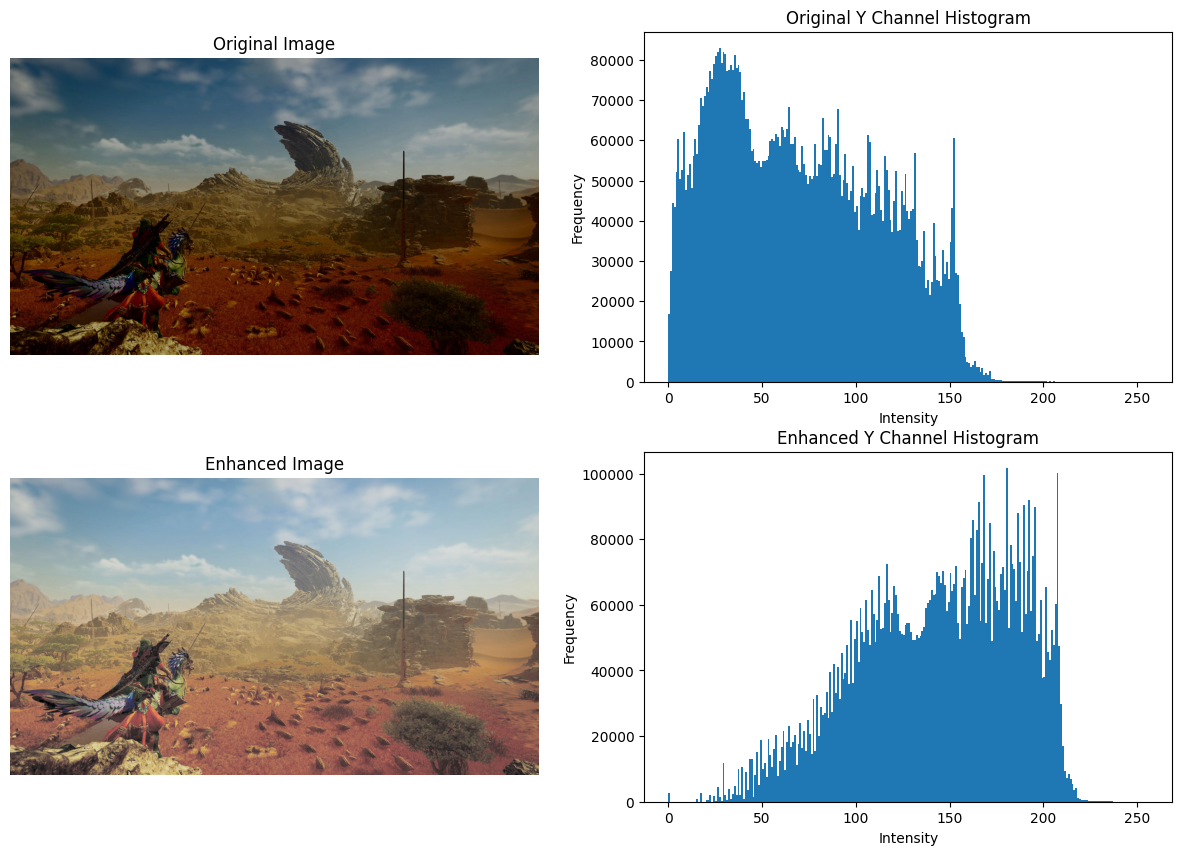

In [16]:
# Display results
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].imshow(dark_image)
axs[0, 0].set_title("Original Image")
axs[0, 0].axis("off")

axs[0, 1].hist(yiQ_img[..., 0].ravel(), bins=256, range=(0, 256))
axs[0, 1].set_title("Original Y Channel Histogram")
axs[0, 1].set_xlabel("Intensity")
axs[0, 1].set_ylabel("Frequency")

axs[1, 0].imshow(enhanced_img)
axs[1, 0].set_title("Enhanced Image")
axs[1, 0].axis("off")

axs[1, 1].hist(yiQ_gamma_img[..., 0].ravel(), bins=256, range=(0, 256))
axs[1, 1].set_title("Enhanced Y Channel Histogram")
axs[1, 1].set_xlabel("Intensity")
axs[1, 1].set_ylabel("Frequency")

plt.show()

## **3. Color Quantization and Dithering (40%)**  
### Implement the following steps to **reduce the number of colors in an image** using **median-cut color quantization** and **error diffusion dithering**.
### (**You cannot use built-in functions for these procedures** except for basic image input/output.)

 - (a) Implement **median-cut color quantization** to reduce the color depth of the input image to **5-bit (32 colors)**. Display the output images for both cases. (15%)
 - (b) Apply **error diffusion dithering** to the quantized images to **reduce color banding artifacts**. Display the dithered output images.  (15%)
 - (c) Visually analyze the results before and after dithering. Compare the images in terms of **color accuracy, smoothness, and introduced artifacts**. Discuss how dithering affects perceptual quality and whether it improves or degrades the image. Use observations from the images themselves rather than numerical metrics. (10%)

### Section (a) Median-Cut Color Quantization

In [21]:
# Median-cut color quantization
def median_cut_quantize(img, depth):
    # TODO
    h, w, _ = img.shape
    pixels = []
    for i in range(h):
        for j in range(w):
            r, g, b = img[i, j].tolist()
            pixels.append((i, j, r, g, b))

    boxes = median_cut(pixels, depth)

    out_img = np.zeros_like(img, dtype=np.uint8)
    palette = []
    for box in boxes:
        if len(box) == 0:
            continue
        sum_r = sum([p[2] for p in box])
        sum_g = sum([p[3] for p in box])
        sum_b = sum([p[4] for p in box])
        n = len(box)
        avg_color = (int(sum_r/n), int(sum_g/n), int(sum_b/n))
        for (i, j, r, g, b) in box:
            out_img[i, j] = avg_color

    return out_img

def median_cut(pixels, depth):
    if depth == 0 or len(pixels) == 0:
        return [pixels]

    r_vals = [p[2] for p in pixels]
    g_vals = [p[3] for p in pixels]
    b_vals = [p[4] for p in pixels]
    range_r = max(r_vals) - min(r_vals)
    range_g = max(g_vals) - min(g_vals)
    range_b = max(b_vals) - min(b_vals)

    if range_r >= range_g and range_r >= range_b:
        sort_channel = 2  # R
    elif range_g >= range_r and range_g >= range_b:
        sort_channel = 3  # G
    else:
        sort_channel = 4  # B

    pixels_sorted = sorted(pixels, key=lambda p: p[sort_channel])
    median_index = len(pixels_sorted) // 2
    left_pixels = pixels_sorted[:median_index]
    right_pixels = pixels_sorted[median_index:]

    return median_cut(left_pixels, depth - 1) + median_cut(right_pixels, depth - 1)

### Section (b) Error Diffusion Dithering

In [22]:
# Error diffusion dithering
def error_diffusion_dither(img, palette):
    # TODO
    h, w, _ = img.shape
    dithered = img.astype(float).copy()

    for i in range(h):
        for j in range(w):
            old_pixel = dithered[i, j].copy()
            new_pixel = find_nearest_palette(old_pixel, palette)
            dithered[i, j] = new_pixel
            error = old_pixel - new_pixel
            if j + 1 < w:
                dithered[i, j + 1] += error * (7/16)
            if i + 1 < h:
                if j - 1 >= 0:
                    dithered[i + 1, j - 1] += error * (3/16)
                dithered[i + 1, j] += error * (5/16)
                if j + 1 < w:
                    dithered[i + 1, j + 1] += error * (1/16)

    dithered = np.clip(dithered, 0, 255)
    return dithered.astype(np.uint8)

def find_nearest_palette(pixel, palette):
    best_color = palette[0]
    best_dist = np.sum((pixel - best_color) ** 2)
    for color in palette:
        dist = np.sum((pixel - color) ** 2)
        if dist < best_dist:
            best_color = color
            best_dist = dist
    return best_color

### Section (c) :
  > (Add your observation here)

The quantized image only has 32 colors, so you can see clear color banding and loss of smooth gradients. After using error diffusion dithering, the image looks smoother because the error is spread out to nearby pixels, softening the sharp changes between colors. Although the dithering adds a bit of noise, it is generally better than having big, noticeable color bands.


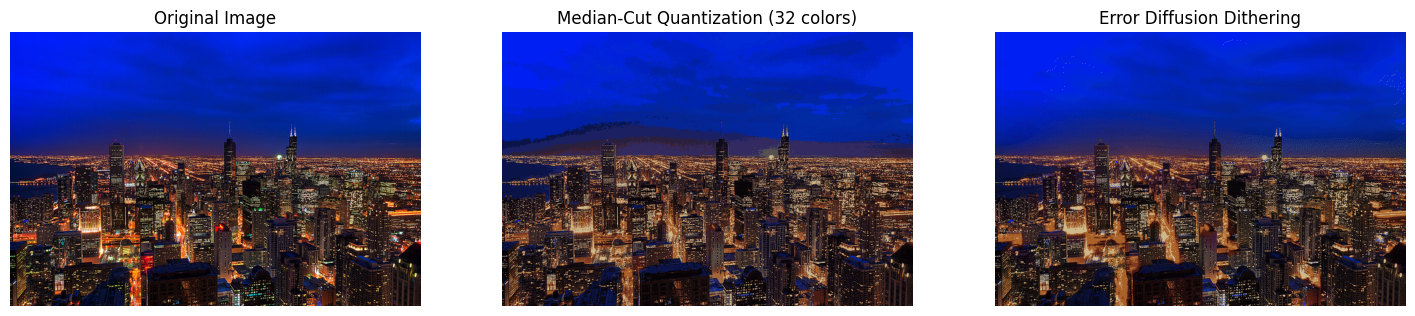

In [ ]:
image = cv2.imread('cityscape.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# (a) Median-cut quantization to 32 colors (5-bit)
quantized_img = median_cut_quantize(image, depth=5)

# (b) Error diffusion dithering on quantized image
palette = np.unique(quantized_img.reshape(-1, 3), axis=0)
dithered_img = error_diffusion_dither(image, palette)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(quantized_img)
axes[1].set_title('Median-Cut Quantization (32 colors)')
axes[1].axis('off')

axes[2].imshow(dithered_img)
axes[2].set_title('Error Diffusion Dithering')
axes[2].axis('off')

plt.show()
